72.39603960396039


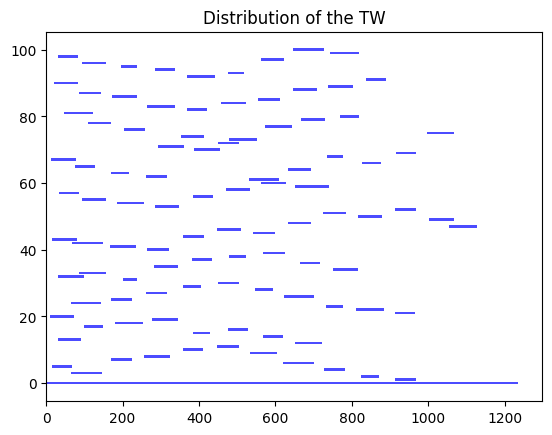

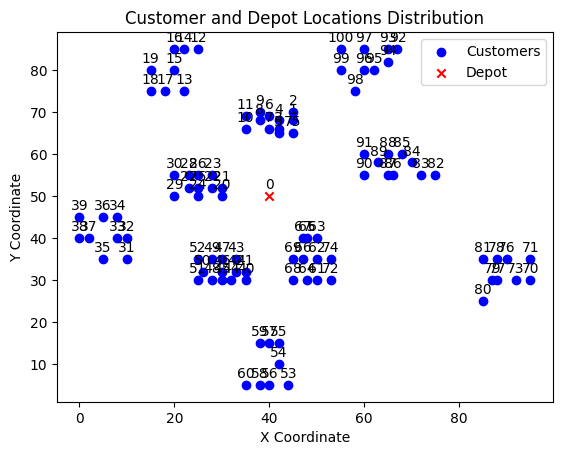

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 在 Notebook 中直接使用相对路径（相对于 Notebook 所在目录）
data_type = "c101"
file_path = f'data/solomon/{data_type}.txt'
with open(file_path, 'r') as file:
    data0 = file.read()

data = []
for line in data0.strip().split('\n'):
    data.append(line.split())

columns = ["CUST", "XCOORD.", 'YCOORD.', 'DEMAND', 'READY', 'DUE', 'SERVICE']
df = pd.DataFrame(data[9:], columns=columns)

numeric_cols = ['CUST', 'XCOORD.', 'YCOORD.', 'DEMAND', 'READY', 'DUE', 'SERVICE']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df['sum'] = df['DUE'] - df['READY']
print(np.mean(df['sum']))

plt.title("Distribution of the TW")
plt.barh(df.index, df['DUE'] - df['READY'], left=df['READY'], color='blue', alpha=0.7)
plt.show()

plt.scatter(df.loc[1:, 'XCOORD.'], df.loc[1:, 'YCOORD.'], label='Customers', marker='o', color='blue')
plt.scatter(df.loc[0, 'XCOORD.'], df.loc[0, 'YCOORD.'], label='Depot', marker='x', color='red')
for i, row in df.iterrows():
    plt.annotate(row['CUST'], (row['XCOORD.'], row['YCOORD.']), textcoords="offset points", xytext=(0, 5), ha='center')
plt.title(f'Customer and Depot Locations Distribution')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()
